In [2]:
# Connecting to google drive
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Olaide Project/

/content/drive/My Drive/Olaide Project


# Importing Libraries


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, r2_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.max_open_warning': 0}) # Hide warnings
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, r2_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.max_open_warning': 0}) # Hide warnings
%matplotlib inline
sns.set_style('whitegrid')

## Getting the Data


In [4]:
df_qs= pd.read_csv('data_qs2.csv') # quetionere data

df_ad= pd.read_csv('data_ad.csv') # Kaggle data

In [5]:
df_ad.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [6]:
df_qs.head(2)

,Timestamp,1. Age,2. Gender,3. Country,4. Average income per annum,5. Average daily internet usage,"6. If you see a new advert, will you click on it?",7. How many times do you click on an advert per day,8. What is the average time spent on a particular site?,9. Do you consider cyber security before clicking on an advert/pop-up?,10. Do you click on an advert/pop-up?,11. What type of online advert headline will you most likely click on?,"12. If others, kindly state","13. Do you usually click on a specific product or service advert? If yes, please specify"
0,2022/11/13 10:39:18 PM GMT,45-54,Male,Nigeria,"101,000 - 300,000",61- 120 minutes,Yes,1 - 5 times,31 - 60 minutes,Yes,Yes,Politics;Family and Religion,NaN,Health and technology
1,2022/11/13 10:44:14 PM GMT,45-54,Male,Nigeria,"101,000 - 300,000",121- 180 minutes,No,1 - 5 times,31 - 60 minutes,No,No,Sports;Others,NaN,Automobile


In [7]:
df_qs.columns

Index(['Timestamp', '1.  Age', '2. Gender', '3. Country',
       '4. Average income per annum', '5.  Average daily internet usage ',
       '6.  If you see a new advert, will you click on it?',
       '7. How many times do you click on an advert per day',
       '8. What is the average time spent on a particular site?',
       '9. Do you consider cyber security before clicking on an advert/pop-up?',
       '10. Do you click on an advert/pop-up?',
       '11. What type of online advert headline will you most likely click on?',
       '12. If others, kindly state ',
       '13. Do you usually click on a specific product or service advert? If yes, please specify'],
      dtype='object')

In [8]:
df_ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [9]:
qs_columns = ['Timestamp', 'Age', 'Male', 'Country',
       'Area_Income', 'Daily_Internet_Usage',
       'click_new',
       'click_per_day',
       'Daily_Time_on_Site',
       'cyber_security',
       'Clicked',
       'prefered_headline',
       'others',
       'specific_product']

df_qs.columns = qs_columns

In [10]:
df_ad.columns = ['Daily_Time_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage', 'Ad_Topic', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked']

In [11]:
df_qs.head(2)

,Timestamp,Age,Male,Country,Area_Income,Daily_Internet_Usage,click_new,click_per_day,Daily_Time_on_Site,cyber_security,Clicked,prefered_headline,others,specific_product
0,2022/11/13 10:39:18 PM GMT,45-54,Male,Nigeria,"101,000 - 300,000",61- 120 minutes,Yes,1 - 5 times,31 - 60 minutes,Yes,Yes,Politics;Family and Religion,NaN,Health and technology
1,2022/11/13 10:44:14 PM GMT,45-54,Male,Nigeria,"101,000 - 300,000",121- 180 minutes,No,1 - 5 times,31 - 60 minutes,No,No,Sports;Others,NaN,Automobile


In [12]:
df_ad.head(2)

,Daily_Time_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic,City,Male,Country,Timestamp,Clicked
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [13]:
df_qs.isnull().sum()

Timestamp                 0
Age                       0
Male                      0
Country                   6
Area_Income               0
Daily_Internet_Usage      0
click_new                 0
click_per_day             0
Daily_Time_on_Site        0
cyber_security            0
Clicked                   0
prefered_headline         0
others                  353
specific_product        164
dtype: int64

In [14]:
df_qs.drop(['others', 'specific_product'],axis = 1, inplace = True)

In [15]:
df_qs.dropna(inplace = True )

In [16]:
df_qs.shape

(382, 12)

In [17]:
df_qs.isnull().sum()

Timestamp               0
Age                     0
Male                    0
Country                 0
Area_Income             0
Daily_Internet_Usage    0
click_new               0
click_per_day           0
Daily_Time_on_Site      0
cyber_security          0
Clicked                 0
prefered_headline       0
dtype: int64

In [18]:
df_qs.head(2)

,Timestamp,Age,Male,Country,Area_Income,Daily_Internet_Usage,click_new,click_per_day,Daily_Time_on_Site,cyber_security,Clicked,prefered_headline
0,2022/11/13 10:39:18 PM GMT,45-54,Male,Nigeria,"101,000 - 300,000",61- 120 minutes,Yes,1 - 5 times,31 - 60 minutes,Yes,Yes,Politics;Family and Religion
1,2022/11/13 10:44:14 PM GMT,45-54,Male,Nigeria,"101,000 - 300,000",121- 180 minutes,No,1 - 5 times,31 - 60 minutes,No,No,Sports;Others


In [19]:
df_qs.Country.value_counts()

Nigeria           315
United Kingdom     46
Canada              7
United States       7
India               5
Australia           1
Option 21           1
Name: Country, dtype: int64

In [20]:
df_qs.Male.value_counts()

Female         198
Male           183
Male;Female      1
Name: Male, dtype: int64

In [21]:
df_qs.Age.value_counts()

35-44                134
25-34                114
45-54                 63
16-24                 58
55 and above          10
16-24;25-34            1
16-24;25-34;45-54      1
16-24;45-54            1
Name: Age, dtype: int64

In [22]:
df_qs.Area_Income.value_counts()

Less than 100,000                      157
Above 1,000, 000                        85
101,000 - 300,000                       79
501,000- 1000,000                       35
301,000 - 500,000                       20
Less than 100,000;101,000 - 300,000      4
Less than 100,000;Above 1,000, 000       1
101,000 - 300,000;501,000- 1000,000      1
Name: Area_Income, dtype: int64

In [23]:
df_qs.Daily_Internet_Usage.value_counts()

181 minutes and above                     89
121- 180 minutes                          69
180 minutes and above                     66
31- 120 minutes                           63
10 - 30 minutes                           31
31 - 60 minutes                           29
61- 120 minutes                           28
0 - 9 minutes                              3
10 - 30 minutes;31 - 60 minutes            1
121- 180 minutes;181 minutes and above     1
10 - 30 minutes;31- 120 minutes            1
31- 120 minutes;121- 180 minutes           1
Name: Daily_Internet_Usage, dtype: int64

In [24]:
df_qs.Clicked.value_counts()

No        276
Yes       104
Yes;No      2
Name: Clicked, dtype: int64

In [25]:
df_qs.Daily_Time_on_Site.value_counts()

10 - 30 minutes                                           117
0 - 10 minutes                                             83
11 - 30 minutes                                            64
31 - 60 minutes                                            58
61- 120 minutes                                            16
180 minutes and above                                      14
61 - 120 minutes                                            8
121 - 180 minutes                                           6
11 - 30 minutes;31 - 60 minutes                             5
121- 180 minutes                                            3
10 - 30 minutes;31 - 60 minutes                             2
0 - 10 minutes;11 - 30 minutes                              2
31 - 60 minutes;61 - 120 minutes;180 minutes and above      1
31  -60 minutes                                             1
31 - 60 minutes;61- 120 minutes                             1
0 - 10 minutes;11 - 30 minutes;31 - 60 minutes              1
Name: Da

In [26]:
df_qs.click_per_day.value_counts()

0 - 5 times           188
1 - 5 times           156
6-10 times             24
10 times and above     14
Name: click_per_day, dtype: int64

In [27]:
df_qs.click_new.value_counts()

No        202
Yes       172
Yes;No      8
Name: click_new, dtype: int64

### Data Cleaning

*We'll like to cahnge the column names and replace the '.' with '_'*

In [28]:
df_qs.head(2)

,Timestamp,Age,Male,Country,Area_Income,Daily_Internet_Usage,click_new,click_per_day,Daily_Time_on_Site,cyber_security,Clicked,prefered_headline
0,2022/11/13 10:39:18 PM GMT,45-54,Male,Nigeria,"101,000 - 300,000",61- 120 minutes,Yes,1 - 5 times,31 - 60 minutes,Yes,Yes,Politics;Family and Religion
1,2022/11/13 10:44:14 PM GMT,45-54,Male,Nigeria,"101,000 - 300,000",121- 180 minutes,No,1 - 5 times,31 - 60 minutes,No,No,Sports;Others


In [29]:
def drop_trash(df,col,trash):
  for i in trash:
    df2 = df[df[col].apply(lambda x: i not in x)]
  return df2

In [30]:
df_qs= pd.read_csv('data_qs2.csv')
df_qs.columns = qs_columns
df_qs.drop(['others', 'specific_product'],axis = 1, inplace = True)
df_qs.dropna(inplace = True )
df_qs = drop_trash(df_qs,'Country', ['Option 21'])
df_qs = drop_trash(df_qs,'Male', [';'])
df_qs = drop_trash(df_qs,'Age', [';'])
df_qs = drop_trash(df_qs,'Area_Income', [';'])
df_qs = drop_trash(df_qs,'Daily_Internet_Usage', [';'])
df_qs = drop_trash(df_qs,'Clicked', [';'])
df_qs = drop_trash(df_qs,'Daily_Time_on_Site', [';'])
df_qs = drop_trash(df_qs,'click_new', [';'])

In [31]:
df_qs.isna().sum()

Timestamp               0
Age                     0
Male                    0
Country                 0
Area_Income             0
Daily_Internet_Usage    0
click_new               0
click_per_day           0
Daily_Time_on_Site      0
cyber_security          0
Clicked                 0
prefered_headline       0
dtype: int64

In [32]:
df_qs.head(2)

,Timestamp,Age,Male,Country,Area_Income,Daily_Internet_Usage,click_new,click_per_day,Daily_Time_on_Site,cyber_security,Clicked,prefered_headline
0,2022/11/13 10:39:18 PM GMT,45-54,Male,Nigeria,"101,000 - 300,000",61- 120 minutes,Yes,1 - 5 times,31 - 60 minutes,Yes,Yes,Politics;Family and Religion
1,2022/11/13 10:44:14 PM GMT,45-54,Male,Nigeria,"101,000 - 300,000",121- 180 minutes,No,1 - 5 times,31 - 60 minutes,No,No,Sports;Others


In [33]:
df_qs.shape

(351, 12)

In [34]:
df_qs.describe()

,Timestamp,Age,Male,Country,Area_Income,Daily_Internet_Usage,click_new,click_per_day,Daily_Time_on_Site,cyber_security,Clicked,prefered_headline
count,351,351,351,351,351,351,351,351,351,351,351,351
unique,350,5,2,6,5,8,2,4,10,3,2,93
top,2022/11/14 4:01:33 PM GMT,35-44,Female,Nigeria,"Less than 100,000",181 minutes and above,No,0 - 5 times,10 - 30 minutes,Yes,No,Fashion and Entertainment
freq,2,127,181,287,142,84,193,169,112,308,256,48


### Univariate Analysis

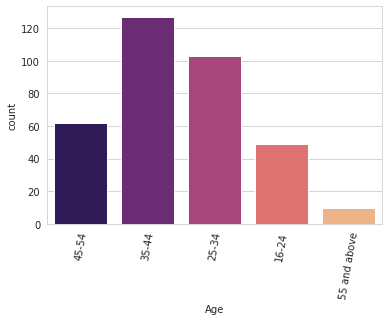

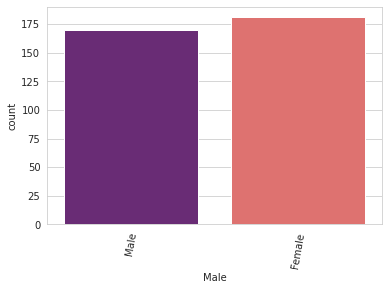

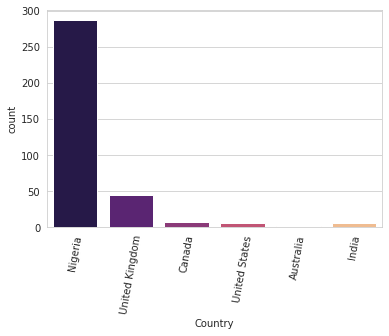

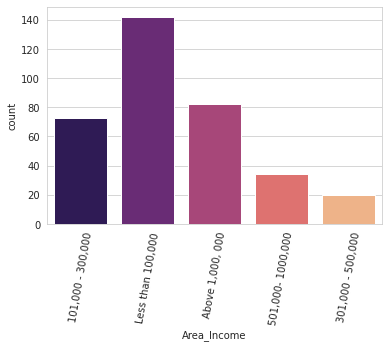

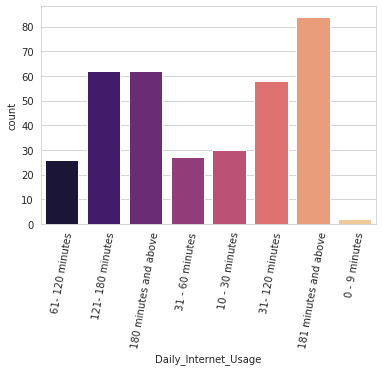

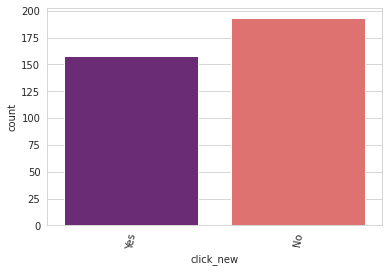

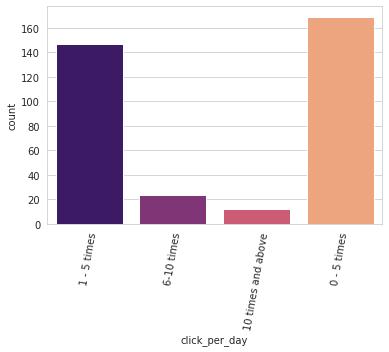

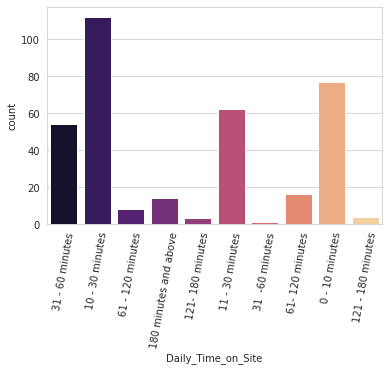

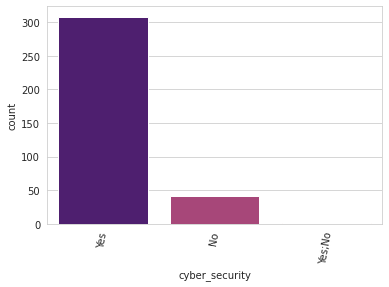

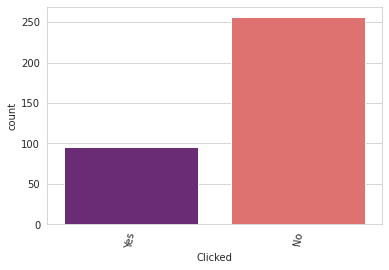

In [35]:
# Distribution of Categotical Varriable

df1 = df_qs.select_dtypes(exclude=['int64']).drop(['Timestamp', 'prefered_headline'], axis= 1)
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1,palette='magma')
    plt.yticks(size=10)
    plt.xticks(rotation=80, size=10)
    plt.show()

### Bivariate Analysis

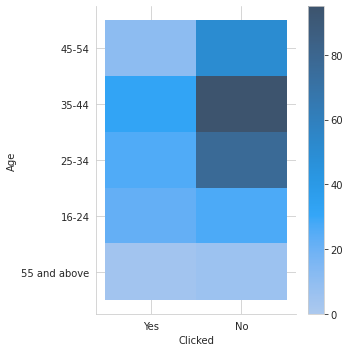

In [36]:
sns.displot(df_qs, x="Clicked", y="Age", binwidth=(2, .5),  cbar=True)

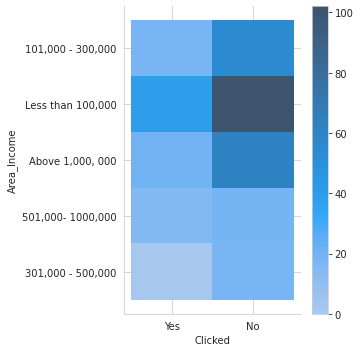

In [37]:
sns.displot(df_qs, x="Clicked", y="Area_Income", binwidth=(2, .5),  cbar=True)

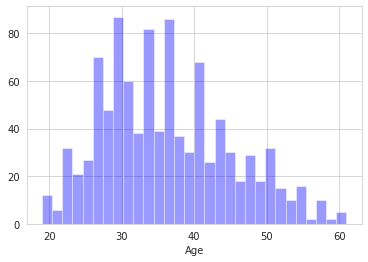

In [38]:
sns.distplot(df_ad['Age'], bins=30, kde=False, color= 'blue')

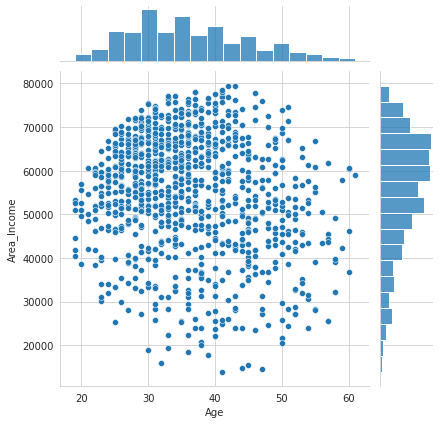

In [39]:
sns.jointplot(data=df_ad, x='Age', y='Area_Income')

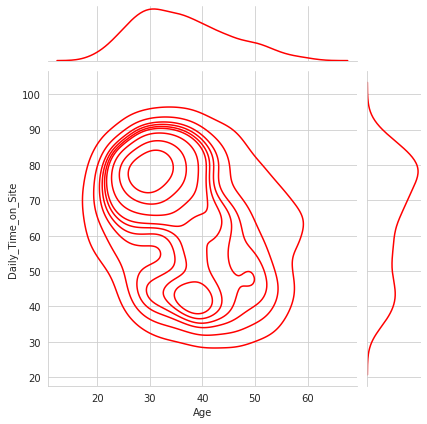

In [40]:
sns.jointplot(data= df_ad, x='Age', y='Daily_Time_on_Site', kind='kde', color='red')

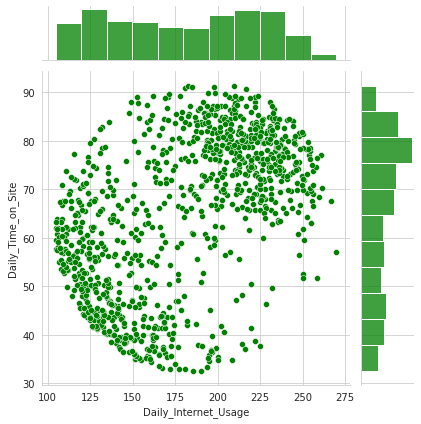

In [41]:
sns.jointplot(data=df_ad, x='Daily_Internet_Usage', y='Daily_Time_on_Site', color='green')

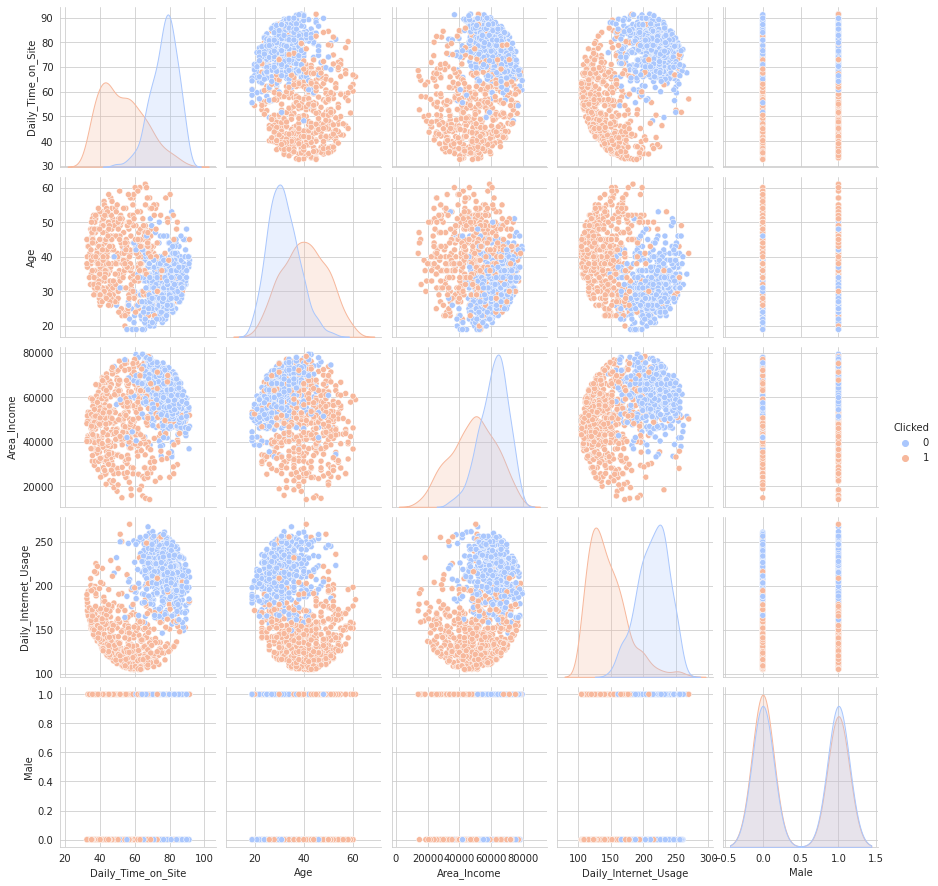

In [42]:
sns.pairplot(df_ad, hue='Clicked', palette='coolwarm')

In [43]:
df_qs.head(2)

,Timestamp,Age,Male,Country,Area_Income,Daily_Internet_Usage,click_new,click_per_day,Daily_Time_on_Site,cyber_security,Clicked,prefered_headline
0,2022/11/13 10:39:18 PM GMT,45-54,Male,Nigeria,"101,000 - 300,000",61- 120 minutes,Yes,1 - 5 times,31 - 60 minutes,Yes,Yes,Politics;Family and Religion
1,2022/11/13 10:44:14 PM GMT,45-54,Male,Nigeria,"101,000 - 300,000",121- 180 minutes,No,1 - 5 times,31 - 60 minutes,No,No,Sports;Others


In [44]:
df_ad.head(2)

,Daily_Time_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic,City,Male,Country,Timestamp,Clicked
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [45]:
df_ad.describe()

,Daily_Time_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [46]:
df_qs.value_counts('Age')

Age
35-44           127
25-34           103
45-54            62
16-24            49
55 and above     10
dtype: int64

In [47]:
print(int(np.round(np.mean([35,44]))))
print(int(np.round(np.mean([25,34]))))
print(int(np.round(np.mean([45,54]))))
print(int(np.round(np.mean([16,24]))))
print(int(np.round(np.mean([55,65]))))

40
30
50
20
60


In [48]:
df_qs['Age'] = (df_qs['Age']
                .map({'35-44': 40, '25-34': 30, '45-54': 50, 
                      '16-24': 20, '55 and above': 60}))

In [49]:
df_qs['Clicked'] = df_qs['Clicked'] .map({'Yes': 1, 'No': 0})

In [50]:
df_qs['Male'] = df_qs['Male'] .map({'Male': 1, 'Female': 0})

In [51]:
print('10 - 30 minutes ---- ', int(np.round(np.mean([10,30]))))
print('0 - 10 minutes ---- ', int(np.round(np.mean([0,10]))))
print('31 - 60 minutes ---- ',int(np.round(np.mean([31,60]))))
print('61- 120 minutes ----',int(np.round(np.mean([61,120]))))
print('180 minutes and above ---- ',int(np.round(np.mean([180,300]))))
print('121- 180 minutes ----',int(np.round(np.mean([121,180]))))

10 - 30 minutes ----  20
0 - 10 minutes ----  5
31 - 60 minutes ----  46
61- 120 minutes ---- 90
180 minutes and above ----  240
121- 180 minutes ---- 150


In [52]:
df_qs['Daily_Time_on_Site'] = (df_qs['Daily_Time_on_Site']
                .map({'10 - 30 minutes': 20, '0 - 10 minutes':5, '11 - 30 minutes':20, 
                      '31 - 60 minutes': 46, '61- 120 minutes': 90,
                      '121 - 180 minutes': 150, '121- 180 minutes': 150,
                      '31  -60 minutes': 46}))

In [53]:
print('10 - 30 minutes ---- ', int(np.round(np.mean([10,30]))))
print('0 - 10 minutes ---- ', int(np.round(np.mean([0,10]))))
print('31 - 60 minutes ---- ',int(np.round(np.mean([31,60]))))
print('61- 120 minutes ----',int(np.round(np.mean([61,120]))))
print('180 minutes and above ---- ',int(np.round(np.mean([180,300]))))
print('121- 180 minutes ----',int(np.round(np.mean([121,180]))))
print('31- 120 minutes ----',int(np.round(np.mean([31,120]))))
print('180- above ----',int(np.round(np.mean([180,300]))))

10 - 30 minutes ----  20
0 - 10 minutes ----  5
31 - 60 minutes ----  46
61- 120 minutes ---- 90
180 minutes and above ----  240
121- 180 minutes ---- 150
31- 120 minutes ---- 76
180- above ---- 240


In [54]:
df_qs['Daily_Internet_Usage'] = (df_qs['Daily_Internet_Usage']
                .map({'181 minutes and above': 240, '121- 180 minutes':150, '180 minutes and above':240, 
                      '31- 120 minutes': 76, '10 - 30 minutes': 20,
                      '31 - 60 minutes': 46, '61- 120 minutes': 90,
                      '0 - 9 minutes': 5}))

In [55]:
# Area_Income
# Looking at the distribution and range of values of the amounts, I assume they are in form of naira biweekly salary
# To tally with the kagle data, I'll convert to annual USD (usin #400 to 1USD conversion rate)

print('Less than 100,000 ---- ', int(np.round(np.mean([50000,100000])/400*24)))
print('Above 1,000, 000 ---- ', int(np.round(np.mean([1000000,2000000])/400*24)))
print('101,000 - 300,000 ---- ',int(np.round(np.mean([101000 , 300000])/400*24)))
print('501,000- 1000,000 ----',int(np.round(np.mean([501000, 1000000])/400*24)))
print('301,000 - 500,000 ---- ',int(np.round(np.mean([301000 , 500000])/400*24)))

Less than 100,000 ----  4500
Above 1,000, 000 ----  90000
101,000 - 300,000 ----  12030
501,000- 1000,000 ---- 45030
301,000 - 500,000 ----  24030


In [56]:
df_qs['Area_Income'] = (df_qs['Area_Income']
                .map({'Less than 100,000': 4500, 'Above 1,000, 000':90000, '101,000 - 300,000':12030, 
                      '501,000- 1000,000': 45030, '301,000 - 500,000': 24030}))

In [57]:
df_ad.drop(['Ad_Topic', 'City', 'Country', 'Timestamp'], axis = 1, inplace = True )

In [58]:
df_ad.head(2)

,Daily_Time_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0


In [59]:
df_qs.drop(['click_per_day', 'click_new', 'Country', 'Timestamp', 'cyber_security', 'prefered_headline'], axis = 1, inplace = True )
df_qs.head(2)

,Age,Male,Area_Income,Daily_Internet_Usage,Daily_Time_on_Site,Clicked
0,50,1,12030,90,46.0,1
1,50,1,12030,150,46.0,0


In [60]:
df_qs.isna().sum()

Age                      0
Male                     0
Area_Income              0
Daily_Internet_Usage     0
Daily_Time_on_Site      22
Clicked                  0
dtype: int64

In [61]:
df_qs.dropna(inplace = True )

## Modelling

In [62]:
df_qs.skew(axis = 0, skipna = True)

Age                     0.063985
Male                    0.116225
Area_Income             0.969872
Daily_Internet_Usage   -0.066239
Daily_Time_on_Site      2.641456
Clicked                 1.109123
dtype: float64

In [63]:
No_Clicked, Clicked = np.bincount(df_qs['Clicked'])
total = No_Clicked + Clicked
print('Examples:\n    Total: {}\n    Clicked: {} ({:.2f}% of total)\n'.format(
    total, Clicked, 100 * Clicked / total))
print('No_Clicked: {} ({:.2f}% of total)\n'.format(No_Clicked, 100 * No_Clicked / total))

Examples:
    Total: 329
    Clicked: 85 (25.84% of total)

No_Clicked: 244 (74.16% of total)



In [64]:
df_qs.describe()

,Age,Male,Area_Income,Daily_Internet_Usage,Daily_Time_on_Site,Clicked
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,36.899696,0.471125,30845.562310,146.413374,27.006079,0.258359
std,10.216810,0.499926,34292.480053,83.544894,26.770023,0.438399
min,20.000000,0.000000,4500.000000,5.000000,5.000000,0.000000
25%,30.000000,0.000000,4500.000000,76.000000,20.000000,0.000000
50%,40.000000,0.000000,12030.000000,150.000000,20.000000,0.000000
75%,40.000000,1.000000,45030.000000,240.000000,20.000000,1.000000
max,60.000000,1.000000,90000.000000,240.000000,150.000000,1.000000


In [65]:
# Balancing the questioneer dataset

from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df_qs[(df_qs['Clicked']==0)] 
df_minority = df_qs[(df_qs['Clicked']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 256, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_unsampled = pd.concat([df_minority_upsampled, df_majority])

In [66]:
df_qs = df_unsampled

df_qs.shape

(500, 6)

In [67]:
No_Clicked, Clicked = np.bincount(df_qs['Clicked'])
total = No_Clicked + Clicked
print('Examples:\n    Total: {}\n    Clicked: {} ({:.2f}% of total)\n'.format(
    total, Clicked, 100 * Clicked / total))
print('No_Clicked: {} ({:.2f}% of total)\n'.format(No_Clicked, 100 * No_Clicked / total))

Examples:
    Total: 500
    Clicked: 256 (51.20% of total)

No_Clicked: 244 (48.80% of total)



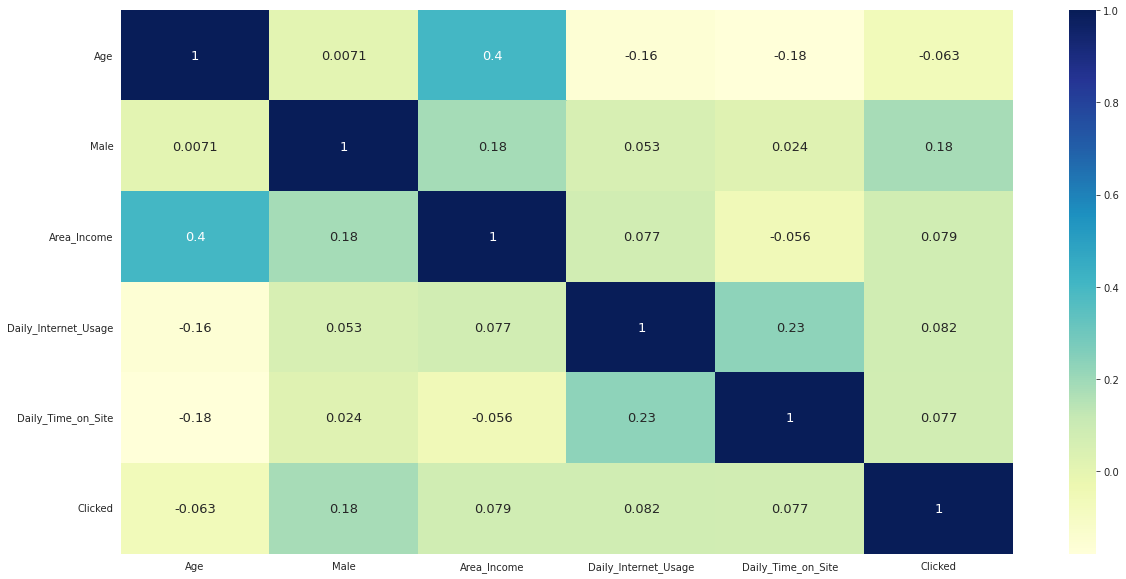

In [68]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(20,10)) 
#mask = np.triu(np.ones_like(df.corr()))
dataplot = sns.heatmap(df_qs.corr(), cmap="YlGnBu", annot=True,annot_kws={'size': 13},ax=ax)
  
# displaying heatmap
plt.show()

In [69]:
# Classification Modeling

# Split dataset
X, y = df_qs.iloc[:, :-1], df_qs.iloc[:, -1]

In [70]:
# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [71]:
# Data Scaling

# First we need to know which columns are binary, nominal and numerical
def get_columns_by_category():
    categorical_mask = X.select_dtypes(
        include=['object']).apply(pd.Series.nunique) == 2
    numerical_mask = X.select_dtypes(
        include=['int64', 'float64']).apply(pd.Series.nunique) > 5

    binary_columns = X[categorical_mask.index[categorical_mask]].columns
    nominal_columns = X[categorical_mask.index[~categorical_mask]].columns
    numerical_columns = X[numerical_mask.index[numerical_mask]].columns

    return binary_columns, nominal_columns, numerical_columns

In [72]:
binary_columns, nominal_columns, numerical_columns = get_columns_by_category()

In [73]:
# Now we can create a column transformer pipeline

transformers = [('nominal', OneHotEncoder(), nominal_columns),
                ('numerical', StandardScaler(), numerical_columns)]

transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')

In [74]:
# Starified k cross validation
Kfold = StratifiedKFold(n_splits=5)

In [75]:
# Lets stack up our classifiers:

RANDOM_STATE = 42
classifiers = [LogisticRegression(max_iter=70, solver='sag', random_state=RANDOM_STATE),
               DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
               SVC(C=2, kernel='linear', random_state=RANDOM_STATE),
               RandomForestClassifier(
                   max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
               AdaBoostClassifier(DecisionTreeClassifier(
                   max_depth=1, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
               GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               GaussianNB(var_smoothing=1e-2)
               ]

In [76]:
classifiers_names = ['Logistic Regression',
                     'Decision Tree Classifier',
                     'Support Vector Machine',
                     'Random Forest Classifier',
                     'AdaBoost Classifier',
                     'Gradient Boosting Classifier',
                     'K Neighbors Classifier',
                     'Gaussian Naive Bayes']

pipelines = [Pipeline([('transformer', transformer_pipeline), (classifier_name, classifier)])
             for classifier_name, classifier in zip(classifiers_names, classifiers)]

In [77]:
# Cross Validation.

def cv_fit_models():
    train_acc_results = []
    cv_scores = {classifier_name: [] for classifier_name in classifiers_names}
    for classifier_name, pipeline in zip(classifiers_names, pipelines):
        cv_score = cross_validate(pipeline,
                                  X_train,
                                  y_train,
                                  scoring=scoring,
                                  cv=Kfold,
                                  return_train_score=True,
                                  return_estimator=True)

        train_accuracy = cv_score['train_acc'].mean() * 100
        
        train_acc_results.append(train_accuracy)
        cv_scores[classifier_name].append(cv_score)

    return np.array(train_acc_results), cv_scores

In [78]:
X_train.head()

,Age,Male,Area_Income,Daily_Internet_Usage,Daily_Time_on_Site
69,50,0,24030,150,20.0
260,40,0,4500,240,90.0
96,20,0,4500,46,20.0
362,20,0,4500,150,90.0
119,40,1,90000,150,20.0


In [79]:
scoring = {'acc': 'accuracy'}

results, folds_scores = cv_fit_models()

In [80]:
# Pick the best fold for each model according to the highest test accuracy:

def pick_best_estimator():
    best_estimators = {classifier_name: [] for classifier_name in classifiers_names}
    for key, model in folds_scores.items():
        best_acc_idx = np.argmax(model[0]['test_acc'])
        best_model = model[0]['estimator'][best_acc_idx]
        best_estimators[key].append(best_model)
    return best_estimators

In [81]:
best_estimators = pick_best_estimator()

In [82]:
# Now we finally can get the accuracy scores of each best fold 
# and at the same time get their precision & recall scores:

def gather_metrics_scores():
    test_accs, precisions, recalls = [], [], []
    for estimator_val in best_estimators.values():
        estimator = estimator_val[0]
        y_pred = estimator.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        score = estimator.score(X_test, y_test)

        test_accs.append(score)
        precisions.append(precision)
        recalls.append(recall)
        
    scores = {'test_acc': np.array(test_accs),
              'precision': np.array(precisions),
              'recall': np.array(recalls)}
    
    return scores

In [83]:
scores = gather_metrics_scores()

In [84]:
# Plot metrics

def plot_train_test_accuracy(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='train_accuracy',
                y='Model', orient='h', ax=ax[0],
               order=df.sort_values('train_accuracy',ascending = False).Model)
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_accuracy',
                y='Model', orient='h', ax=ax[1],
               order=df.sort_values('test_accuracy',ascending = False).Model)
    ax[1].set_xlim([0, 100])

In [85]:
results_df = pd.DataFrame({'Model': classifiers_names,
                           'train_accuracy': results,
                           'test_accuracy': scores['test_acc'] * 100,
                           'test_precision': scores['precision'] * 100,
                           'test_recall': scores['recall'] * 100})

In [86]:
results_df

,Model,train_accuracy,test_accuracy,test_precision,test_recall
0,Logistic Regression,52.000000,48.8,23.814400,48.8
1,Decision Tree Classifier,60.533333,58.4,58.668323,58.4
2,Support Vector Machine,52.866667,54.4,55.064048,54.4
3,Random Forest Classifier,75.333333,73.6,73.684836,73.6
4,AdaBoost Classifier,65.266667,68.0,68.043011,68.0
5,Gradient Boosting Classifier,60.000000,55.2,61.401905,55.2
6,K Neighbors Classifier,76.666667,72.0,72.195172,72.0
7,Gaussian Naive Bayes,56.666667,57.6,57.912907,57.6


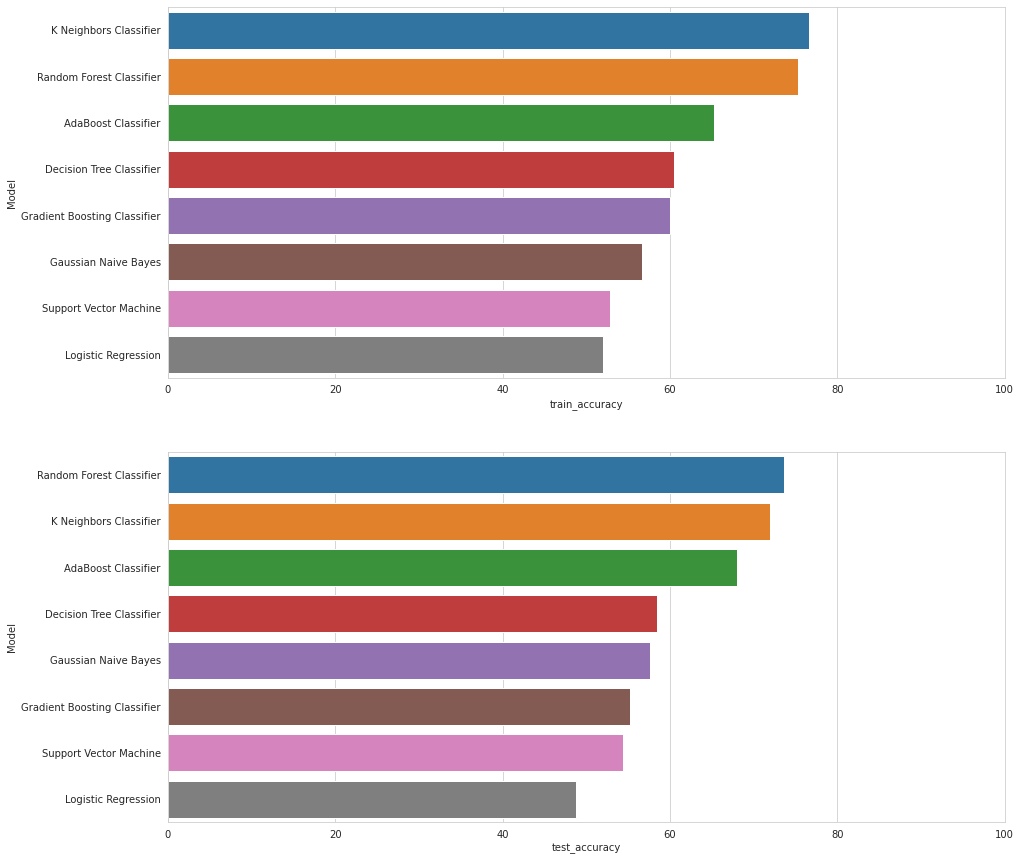

In [87]:
plot_train_test_accuracy(results_df)

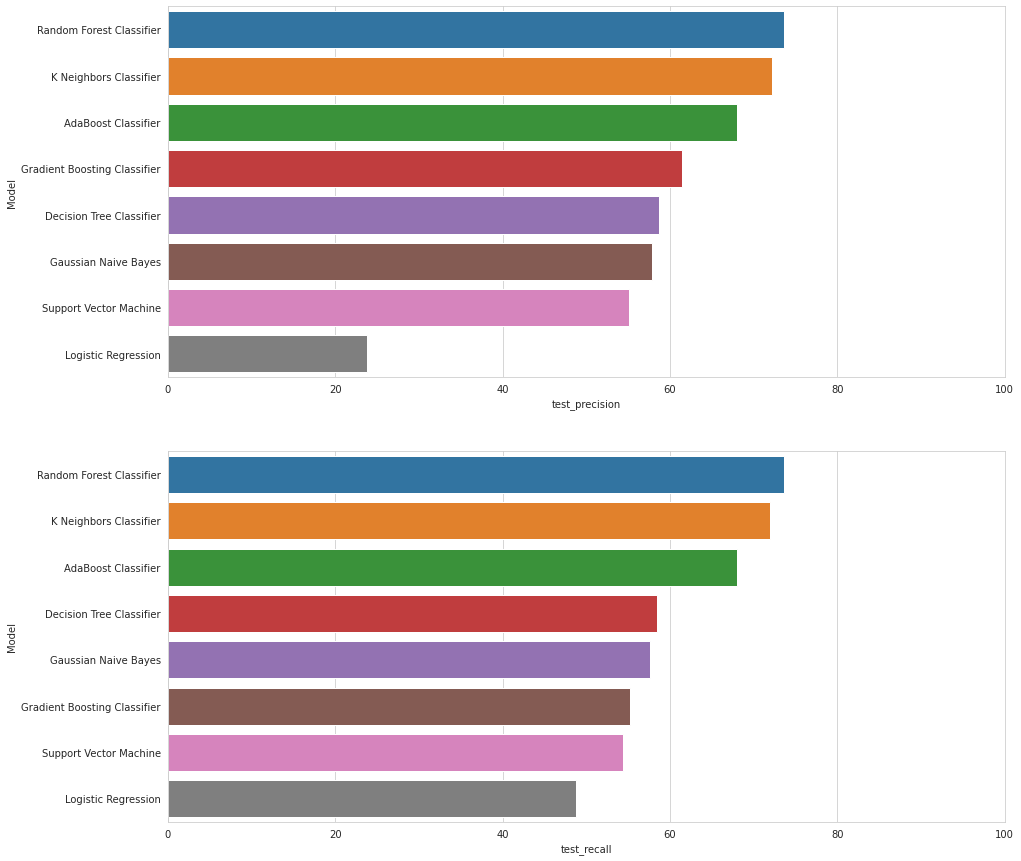

In [88]:
def plot_precision_recall(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='test_precision',
                y='Model', orient='h', ax=ax[0],
               order=df.sort_values('test_precision',ascending = False).Model)
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_recall',
                y='Model', orient='h', ax=ax[1],
               order=df.sort_values('test_recall',ascending = False).Model)
    ax[1].set_xlim([0, 100])

plot_precision_recall(results_df)

### Conclusion:

#### Generally, Random Forest Classifier seem to give us the best results.

### Modelling the Kaggle data only

In [89]:
# Classification Modeling

# Split dataset
X, y = df_ad.iloc[:, :-1], df_ad.iloc[:, -1]

# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Data Scaling

# First we need to know which columns are binary, nominal and numerical
def get_columns_by_category():
    categorical_mask = X.select_dtypes(
        include=['object']).apply(pd.Series.nunique) == 2
    numerical_mask = X.select_dtypes(
        include=['int64', 'float64']).apply(pd.Series.nunique) > 5

    binary_columns = X[categorical_mask.index[categorical_mask]].columns
    nominal_columns = X[categorical_mask.index[~categorical_mask]].columns
    numerical_columns = X[numerical_mask.index[numerical_mask]].columns

    return binary_columns, nominal_columns, numerical_columns


binary_columns, nominal_columns, numerical_columns = get_columns_by_category()


# Now we can create a column transformer pipeline

transformers = [('nominal', OneHotEncoder(), nominal_columns),
                ('numerical', StandardScaler(), numerical_columns)]

transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')


# Starified k cross validation
Kfold = StratifiedKFold(n_splits=5)


# Lets stack up our classifiers:

RANDOM_STATE = 42
classifiers = [LogisticRegression(max_iter=70, solver='sag', random_state=RANDOM_STATE),
               DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
               SVC(C=2, kernel='linear', random_state=RANDOM_STATE),
               RandomForestClassifier(
                   max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
               AdaBoostClassifier(DecisionTreeClassifier(
                   max_depth=1, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
               GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               GaussianNB(var_smoothing=1e-2)
               ]


classifiers_names = ['Logistic Regression',
                     'Decision Tree Classifier',
                     'Support Vector Machine',
                     'Random Forest Classifier',
                     'AdaBoost Classifier',
                     'Gradient Boosting Classifier',
                     'K Neighbors Classifier',
                     'Gaussian Naive Bayes']

pipelines = [Pipeline([('transformer', transformer_pipeline), (classifier_name, classifier)])
             for classifier_name, classifier in zip(classifiers_names, classifiers)]



# Cross Validation.

def cv_fit_models():
    train_acc_results = []
    cv_scores = {classifier_name: [] for classifier_name in classifiers_names}
    for classifier_name, pipeline in zip(classifiers_names, pipelines):
        cv_score = cross_validate(pipeline,
                                  X_train,
                                  y_train,
                                  scoring=scoring,
                                  cv=Kfold,
                                  return_train_score=True,
                                  return_estimator=True)

        train_accuracy = cv_score['train_acc'].mean() * 100
        
        train_acc_results.append(train_accuracy)
        cv_scores[classifier_name].append(cv_score)

    return np.array(train_acc_results), cv_scores



scoring = {'acc': 'accuracy'}

results, folds_scores = cv_fit_models()


# Pick the best fold for each model according to the highest test accuracy:

def pick_best_estimator():
    best_estimators = {classifier_name: [] for classifier_name in classifiers_names}
    for key, model in folds_scores.items():
        best_acc_idx = np.argmax(model[0]['test_acc'])
        best_model = model[0]['estimator'][best_acc_idx]
        best_estimators[key].append(best_model)
    return best_estimators
  

best_estimators = pick_best_estimator()



# Now we finally can get the accuracy scores of each best fold 
# and at the same time get their precision & recall scores:

def gather_metrics_scores():
    test_accs, precisions, recalls = [], [], []
    for estimator_val in best_estimators.values():
        estimator = estimator_val[0]
        y_pred = estimator.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        score = estimator.score(X_test, y_test)

        test_accs.append(score)
        precisions.append(precision)
        recalls.append(recall)
        
    scores = {'test_acc': np.array(test_accs),
              'precision': np.array(precisions),
              'recall': np.array(recalls)}
    
    return scores

  
scores = gather_metrics_scores()


# Plot metrics

def plot_train_test_accuracy(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='train_accuracy',
                y='Model', orient='h', ax=ax[0],
               order=df.sort_values('train_accuracy',ascending = False).Model)
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_accuracy',
                y='Model', orient='h', ax=ax[1],
               order=df.sort_values('test_accuracy',ascending = False).Model)
    ax[1].set_xlim([0, 100])


results_df = pd.DataFrame({'Model': classifiers_names,
                           'train_accuracy': results,
                           'test_accuracy': scores['test_acc'] * 100,
                           'test_precision': scores['precision'] * 100,
                           'test_recall': scores['recall'] * 100})

In [90]:
results_df

,Model,train_accuracy,test_accuracy,test_precision,test_recall
0,Logistic Regression,97.533333,96.0,96.014344,96.0
1,Decision Tree Classifier,94.500000,90.4,90.475232,90.4
2,Support Vector Machine,97.600000,95.6,95.604331,95.6
3,Random Forest Classifier,98.033333,92.8,92.800000,92.8
4,AdaBoost Classifier,99.766667,92.8,92.853047,92.8
5,Gradient Boosting Classifier,97.633333,91.6,91.632034,91.6
6,K Neighbors Classifier,97.066667,94.8,94.830805,94.8
7,Gaussian Naive Bayes,97.033333,95.2,95.200000,95.2


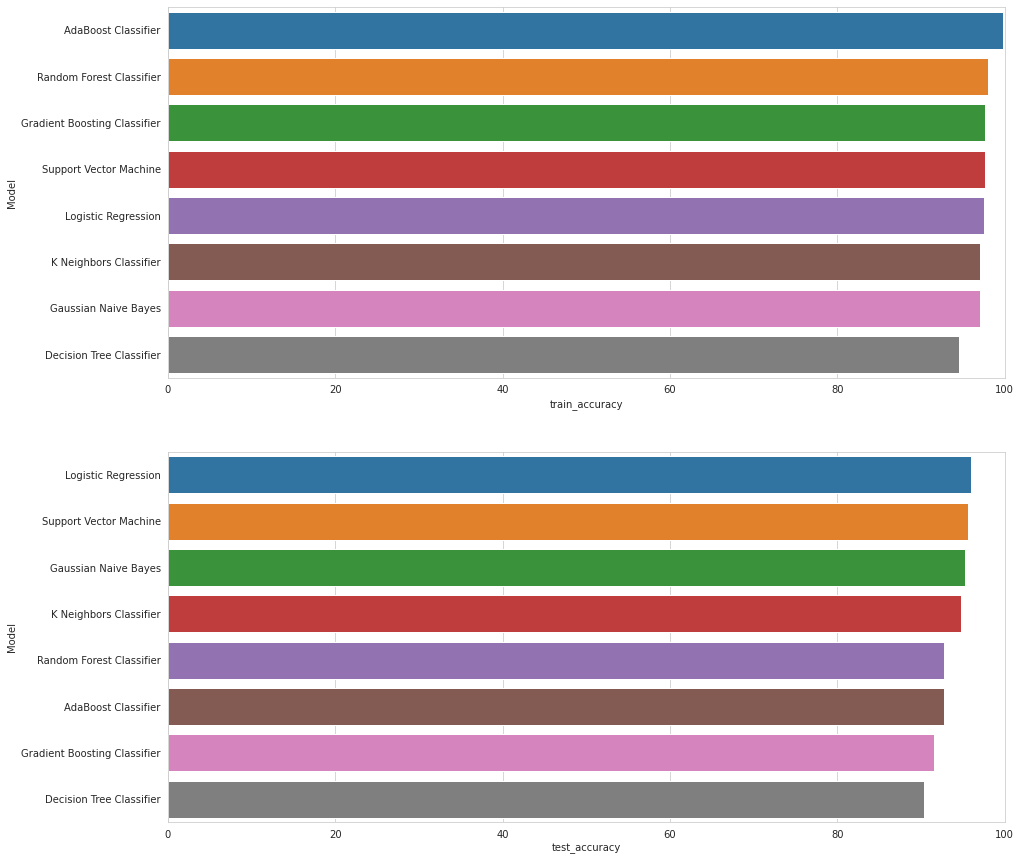

In [91]:
plot_train_test_accuracy(results_df)

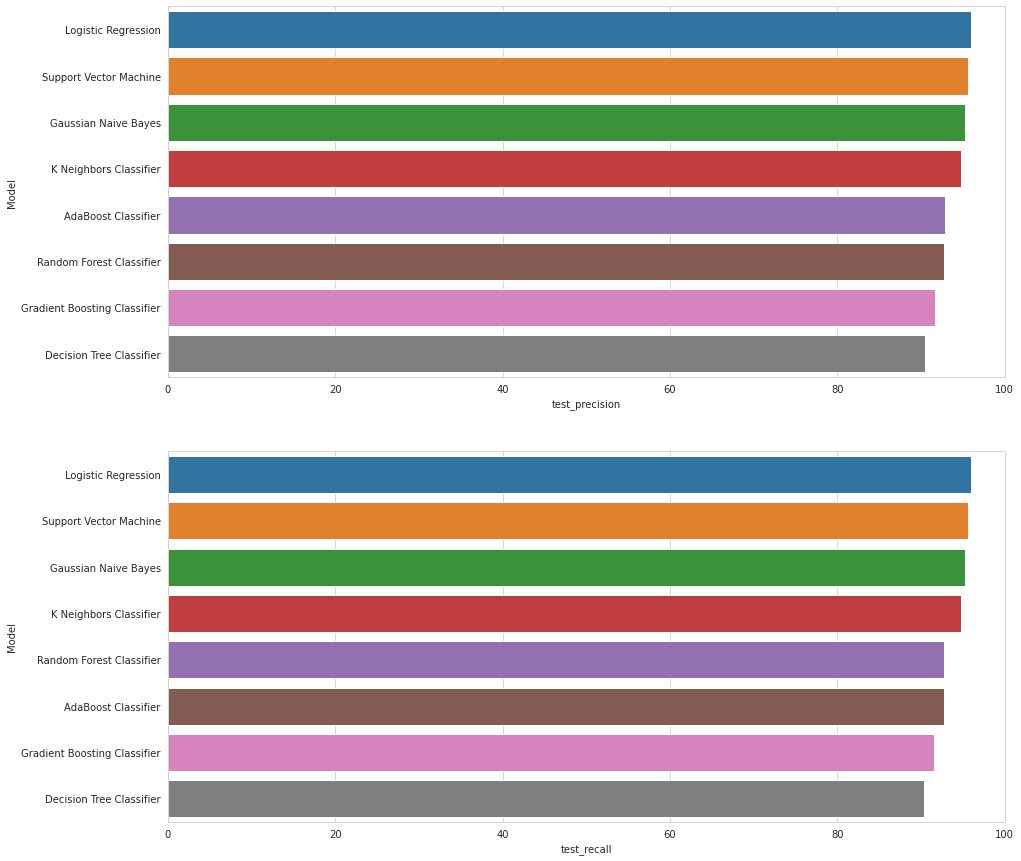

In [92]:
def plot_precision_recall(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='test_precision',
                y='Model', orient='h', ax=ax[0],
               order=df.sort_values('test_precision',ascending = False).Model)
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_recall',
                y='Model', orient='h', ax=ax[1],
               order=df.sort_values('test_recall',ascending = False).Model)
    ax[1].set_xlim([0, 100])

plot_precision_recall(results_df)

### Here, Logistic regression has the best result

### Modelling the merged data

In [93]:
# Merged

df_merged = pd.concat([df_qs, df_ad], ignore_index=True)
df_merged.tail(10)

,Age,Male,Area_Income,Daily_Internet_Usage,Daily_Time_on_Site,Clicked
1490,44,1,33813.08,165.62,35.79,1
1491,38,1,36497.22,140.67,38.96,1
1492,40,0,66193.81,123.62,69.17,1
1493,27,1,66200.96,227.63,64.20,0
1494,28,0,63126.96,173.01,43.70,1
1495,30,1,71384.57,208.58,72.97,1
1496,45,1,67782.17,134.42,51.30,1
1497,51,1,42415.72,120.37,51.63,1
1498,19,0,41920.79,187.95,55.55,0
1499,26,0,29875.80,178.35,45.01,1


In [94]:
df_merged.describe()

,Age,Male,Area_Income,Daily_Internet_Usage,Daily_Time_on_Site,Clicked
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,36.312667,0.498000,47715.746720,170.236733,52.714133,0.504000
std,9.568487,0.500163,24820.779728,61.538974,26.632214,0.500151
min,19.000000,0.000000,4500.000000,5.000000,5.000000,0.000000
25%,30.000000,0.000000,31277.195000,127.777500,32.970000,0.000000
50%,36.000000,0.000000,51866.810000,173.030000,54.380000,1.000000
75%,41.000000,1.000000,65133.700000,228.787500,75.550000,1.000000
max,61.000000,1.000000,90000.000000,269.960000,150.000000,1.000000


In [95]:
No_Clicked, Clicked = np.bincount(df_merged['Clicked'])
total = No_Clicked + Clicked
print('Examples:\n    Total: {}\n    Clicked: {} ({:.2f}% of total)\n'.format(
    total, Clicked, 100 * Clicked / total))
print('No_Clicked: {} ({:.2f}% of total)\n'.format(No_Clicked, 100 * No_Clicked / total))

Examples:
    Total: 1500
    Clicked: 756 (50.40% of total)

No_Clicked: 744 (49.60% of total)



In [96]:
# Classification Modeling

# Split dataset
X, y = df_merged.iloc[:, :-1], df_merged.iloc[:, -1]

# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Data Scaling

# First we need to know which columns are binary, nominal and numerical
def get_columns_by_category():
    categorical_mask = X.select_dtypes(
        include=['object']).apply(pd.Series.nunique) == 2
    numerical_mask = X.select_dtypes(
        include=['int64', 'float64']).apply(pd.Series.nunique) > 5

    binary_columns = X[categorical_mask.index[categorical_mask]].columns
    nominal_columns = X[categorical_mask.index[~categorical_mask]].columns
    numerical_columns = X[numerical_mask.index[numerical_mask]].columns

    return binary_columns, nominal_columns, numerical_columns


binary_columns, nominal_columns, numerical_columns = get_columns_by_category()


# Now we can create a column transformer pipeline

transformers = [('nominal', OneHotEncoder(), nominal_columns),
                ('numerical', StandardScaler(), numerical_columns)]

transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')


# Starified k cross validation
Kfold = StratifiedKFold(n_splits=5)


# Lets stack up our classifiers:

RANDOM_STATE = 42
classifiers = [LogisticRegression(max_iter=70, solver='sag', random_state=RANDOM_STATE),
               DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
               SVC(C=2, kernel='linear', random_state=RANDOM_STATE),
               RandomForestClassifier(
                   max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
               AdaBoostClassifier(DecisionTreeClassifier(
                   max_depth=1, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
               GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               GaussianNB(var_smoothing=1e-2)
               ]


classifiers_names = ['Logistic Regression',
                     'Decision Tree Classifier',
                     'Support Vector Machine',
                     'Random Forest Classifier',
                     'AdaBoost Classifier',
                     'Gradient Boosting Classifier',
                     'K Neighbors Classifier',
                     'Gaussian Naive Bayes']

pipelines = [Pipeline([('transformer', transformer_pipeline), (classifier_name, classifier)])
             for classifier_name, classifier in zip(classifiers_names, classifiers)]



# Cross Validation.

def cv_fit_models():
    train_acc_results = []
    cv_scores = {classifier_name: [] for classifier_name in classifiers_names}
    for classifier_name, pipeline in zip(classifiers_names, pipelines):
        cv_score = cross_validate(pipeline,
                                  X_train,
                                  y_train,
                                  scoring=scoring,
                                  cv=Kfold,
                                  return_train_score=True,
                                  return_estimator=True)

        train_accuracy = cv_score['train_acc'].mean() * 100
        
        train_acc_results.append(train_accuracy)
        cv_scores[classifier_name].append(cv_score)

    return np.array(train_acc_results), cv_scores



scoring = {'acc': 'accuracy'}

results, folds_scores = cv_fit_models()


# Pick the best fold for each model according to the highest test accuracy:

def pick_best_estimator():
    best_estimators = {classifier_name: [] for classifier_name in classifiers_names}
    for key, model in folds_scores.items():
        best_acc_idx = np.argmax(model[0]['test_acc'])
        best_model = model[0]['estimator'][best_acc_idx]
        best_estimators[key].append(best_model)
    return best_estimators
  

best_estimators = pick_best_estimator()



# Now we finally can get the accuracy scores of each best fold 
# and at the same time get their precision & recall scores:

def gather_metrics_scores():
    test_accs, precisions, recalls = [], [], []
    for estimator_val in best_estimators.values():
        estimator = estimator_val[0]
        y_pred = estimator.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        score = estimator.score(X_test, y_test)

        test_accs.append(score)
        precisions.append(precision)
        recalls.append(recall)
        
    scores = {'test_acc': np.array(test_accs),
              'precision': np.array(precisions),
              'recall': np.array(recalls)}
    
    return scores

  
scores = gather_metrics_scores()


# Plot metrics

def plot_train_test_accuracy(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='train_accuracy',
                y='Model', orient='h', ax=ax[0],
               order=df.sort_values('train_accuracy',ascending = False).Model)
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_accuracy',
                y='Model', orient='h', ax=ax[1],
               order=df.sort_values('test_accuracy',ascending = False).Model)
    ax[1].set_xlim([0, 100])


def plot_precision_recall(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='test_precision',
                y='Model', orient='h', ax=ax[0],
               order=df.sort_values('test_precision',ascending = False).Model)
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_recall',
                y='Model', orient='h', ax=ax[1],
               order=df.sort_values('test_recall',ascending = False).Model)
    ax[1].set_xlim([0, 100])



results_df = pd.DataFrame({'Model': classifiers_names,
                           'train_accuracy': results,
                           'test_accuracy': scores['test_acc'] * 100,
                           'test_precision': scores['precision'] * 100,
                           'test_recall': scores['recall'] * 100})

In [97]:
results_df

,Model,train_accuracy,test_accuracy,test_precision,test_recall
0,Logistic Regression,74.888889,74.400000,74.407874,74.400000
1,Decision Tree Classifier,78.933333,76.000000,76.000000,76.000000
2,Support Vector Machine,79.422222,74.666667,75.342375,74.666667
3,Random Forest Classifier,91.066667,85.333333,85.904762,85.333333
4,AdaBoost Classifier,84.911111,80.000000,80.348264,80.000000
5,Gradient Boosting Classifier,81.488889,76.533333,81.867737,76.533333
6,K Neighbors Classifier,90.622222,85.600000,86.037106,85.600000
7,Gaussian Naive Bayes,76.777778,76.800000,76.813790,76.800000


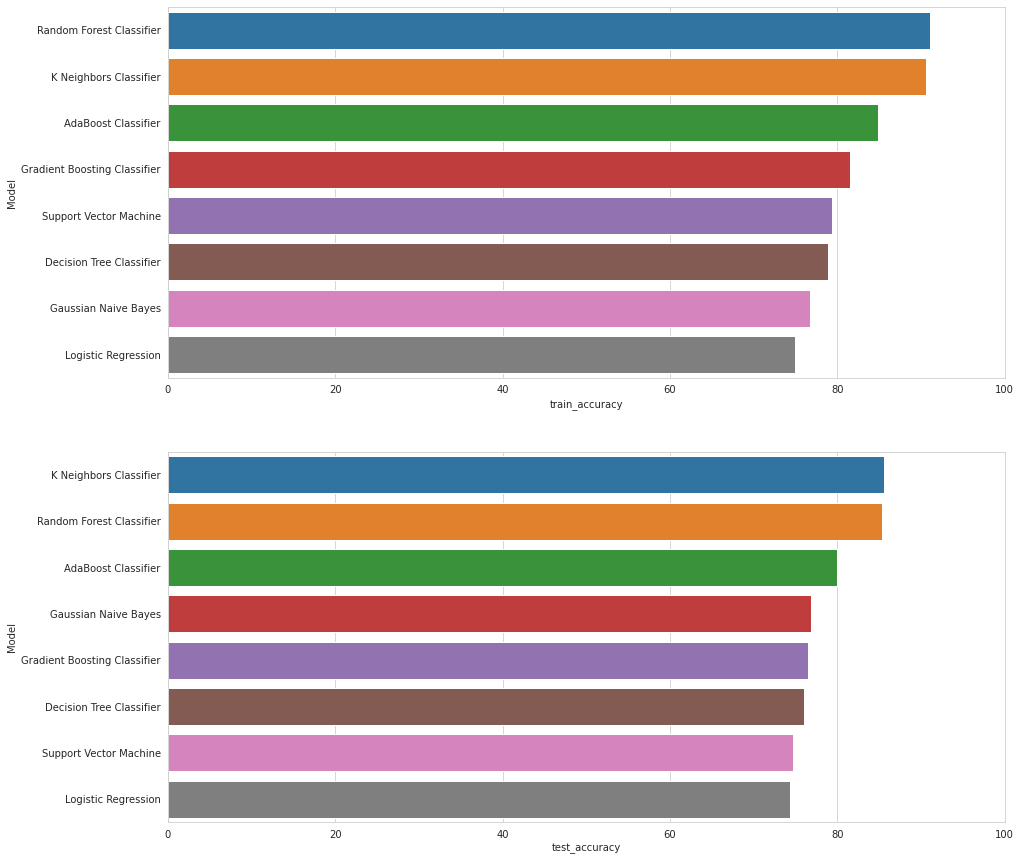

In [98]:
plot_train_test_accuracy(results_df)

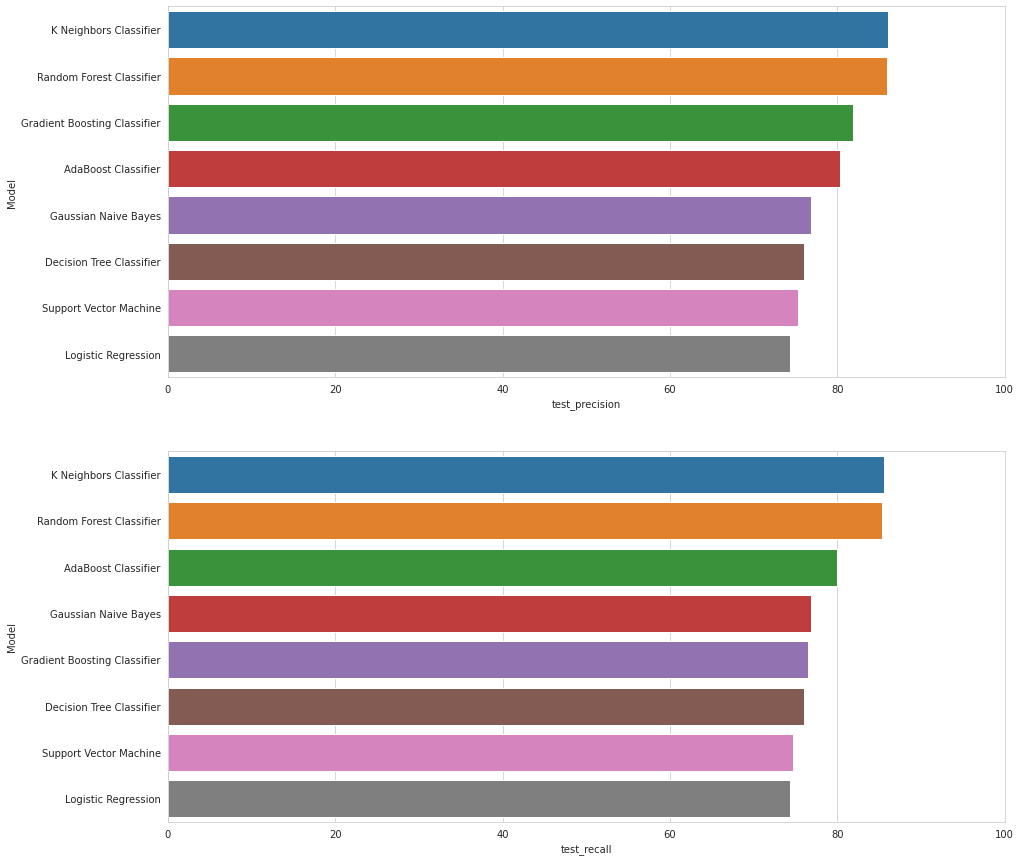

In [99]:
plot_precision_recall(results_df)

### Here also, Random-forest classifier had the best result, we will be using it with the merged dataset.

In [100]:
model=RandomForestClassifier(n_estimators=300)

In [101]:
pipe = Pipeline([('transformer', transformer_pipeline), ('Random Forest Classifier', model)])
pipe.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal', OneHotEncoder(),
                                                  Index([], dtype='object')),
                                                 ('numerical', StandardScaler(),
                                                  Index(['Age', 'Area_Income', 'Daily_Internet_Usage', 'Daily_Time_on_Site'], dtype='object'))])),
                ('Random Forest Classifier',
                 RandomForestClassifier(n_estimators=300))])

In [102]:
predict= pipe.predict(X_test)

print(confusion_matrix(predict, y_test))
print('\n')
print(classification_report(predict, y_test))

[[164  10]
 [ 27 174]]


              precision    recall  f1-score   support

           0       0.86      0.94      0.90       174
           1       0.95      0.87      0.90       201

    accuracy                           0.90       375
   macro avg       0.90      0.90      0.90       375
weighted avg       0.91      0.90      0.90       375



In [103]:
pipe.predict(X_test.iloc[[0]])

array([1])

In [104]:
X_test.iloc[[0]]

,Age,Male,Area_Income,Daily_Internet_Usage,Daily_Time_on_Site
1116,41,1,41059.64,109.34,52.7


In [105]:
y_test.head()

1116    1
1368    0
422     0
413     0
451     0
Name: Clicked, dtype: int64

In [106]:
arr = pd.DataFrame((np.array([[41,1,41059.64,109.34,52.7]])
        ), columns=X_train.columns)    
pipe.predict(arr)

array([1])

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


df_qs= pd.read_csv('data_qs2.csv') # quetionere data

df_ad= pd.read_csv('data_ad.csv') # Kaggle data

qs_columns = ['Timestamp', 'Age', 'Male', 'Country',
       'Area_Income', 'Daily_Internet_Usage',
       'click_new',
       'click_per_day',
       'Daily_Time_on_Site',
       'cyber_security',
       'Clicked',
       'prefered_headline',
       'others',
       'specific_product']

df_qs.columns = qs_columns

df_ad.columns = ['Daily_Time_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage', 'Ad_Topic', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked']


df_qs.drop(['others', 'specific_product'],axis = 1, inplace = True)

df_qs.dropna(inplace = True )

def drop_trash(df,col,trash):
  for i in trash:
    df2 = df[df[col].apply(lambda x: i not in x)]
  return df2

df_qs = drop_trash(df_qs,'Country', ['Option 21'])
df_qs = drop_trash(df_qs,'Male', [';'])
df_qs = drop_trash(df_qs,'Age', [';'])
df_qs = drop_trash(df_qs,'Area_Income', [';'])
df_qs = drop_trash(df_qs,'Daily_Internet_Usage', [';'])
df_qs = drop_trash(df_qs,'Clicked', [';'])
df_qs = drop_trash(df_qs,'Daily_Time_on_Site', [';'])
df_qs = drop_trash(df_qs,'click_new', [';'])


df_qs['Age'] = (df_qs['Age']
                .map({'35-44': 40, '25-34': 30, '45-54': 50, 
                      '16-24': 20, '55 and above': 60}))


df_qs['Clicked'] = df_qs['Clicked'] .map({'Yes': 1, 'No': 0})


df_qs['Male'] = df_qs['Male'] .map({'Male': 1, 'Female': 0})

df_qs['Daily_Time_on_Site'] = (df_qs['Daily_Time_on_Site']
                .map({'10 - 30 minutes': 20, '0 - 10 minutes':5, '11 - 30 minutes':20, 
                      '31 - 60 minutes': 46, '61- 120 minutes': 90,
                      '121 - 180 minutes': 150, '121- 180 minutes': 150,
                      '31  -60 minutes': 46}))


df_qs['Daily_Internet_Usage'] = (df_qs['Daily_Internet_Usage']
                .map({'181 minutes and above': 240, '121- 180 minutes':150, '180 minutes and above':240, 
                      '31- 120 minutes': 76, '10 - 30 minutes': 20,
                      '31 - 60 minutes': 46, '61- 120 minutes': 90,
                      '0 - 9 minutes': 5}))



df_qs['Area_Income'] = (df_qs['Area_Income']
                .map({'Less than 100,000': 4500, 'Above 1,000, 000':90000, '101,000 - 300,000':12030, 
                      '501,000- 1000,000': 45030, '301,000 - 500,000': 24030}))


df_ad.drop(['Ad_Topic', 'City', 'Country', 'Timestamp'], axis = 1, inplace = True )

df_qs.drop(['click_per_day', 'click_new', 'Country', 'Timestamp', 'cyber_security', 'prefered_headline'], axis = 1, inplace = True )


df_qs.dropna(inplace = True )

# Balancing the questioneer dataset

from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df_qs[(df_qs['Clicked']==0)] 
df_minority = df_qs[(df_qs['Clicked']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 256, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_unsampled = pd.concat([df_minority_upsampled, df_majority])

df_qs = df_unsampled

df_merged = pd.concat([df_qs, df_ad], ignore_index=True)

# Classification Modeling

# Split dataset
X, y = df_merged.iloc[:, :-1], df_merged.iloc[:, -1]

# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model=RandomForestClassifier(n_estimators=300)




# First we need to know which columns are binary, nominal and numerical
def get_columns_by_category():
    categorical_mask = X.select_dtypes(
        include=['object']).apply(pd.Series.nunique) == 2
    numerical_mask = X.select_dtypes(
        include=['int64', 'float64']).apply(pd.Series.nunique) > 5

    binary_columns = X[categorical_mask.index[categorical_mask]].columns
    nominal_columns = X[categorical_mask.index[~categorical_mask]].columns
    numerical_columns = X[numerical_mask.index[numerical_mask]].columns

    return binary_columns, nominal_columns, numerical_columns

binary_columns, nominal_columns, numerical_columns = get_columns_by_category()

# Now we can create a column transformer pipeline

transformers = [('binary', OrdinalEncoder(), binary_columns),
                ('nominal', OneHotEncoder(), nominal_columns),
                ('numerical', StandardScaler(), numerical_columns)]

transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')

pipe = Pipeline([('transformer', transformer_pipeline), ('Random Forest Classifier', model)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', OrdinalEncoder(),
                                                  Index([], dtype='object')),
                                                 ('nominal', OneHotEncoder(),
                                                  Index([], dtype='object')),
                                                 ('numerical', StandardScaler(),
                                                  Index(['Age', 'Area_Income', 'Daily_Internet_Usage', 'Daily_Time_on_Site'], dtype='object'))])),
                ('Random Forest Classifier',
                 RandomForestClassifier(n_estimators=300))])

In [6]:
arr = pd.DataFrame((np.array([[41,1,41059.64,109.34,52.7]])
        ), columns=X_train.columns)    
pipe.predict(arr).tolist()[0]

1